In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load grayscale image

In [2]:
image = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE)

# 2. Compute Sobel gradient in X and Y directions

In [3]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)   # Gradient in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)   # Gradient in Y direction

# Compute combined gradient magnitude
gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)

# 3. Normalize gradient to range [0, 255]

In [4]:
gradient_normalized = cv2.normalize(
    gradient_mag, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
)
gradient_normalized = gradient_normalized.astype(np.uint8)

# 4. Add gradient to the original image to sharpen edges

In [5]:
# Using cv2.add to avoid overflow (pixel clipping)
sharpened = cv2.add(image, gradient_normalized)

# 5. Display original and sharpened images

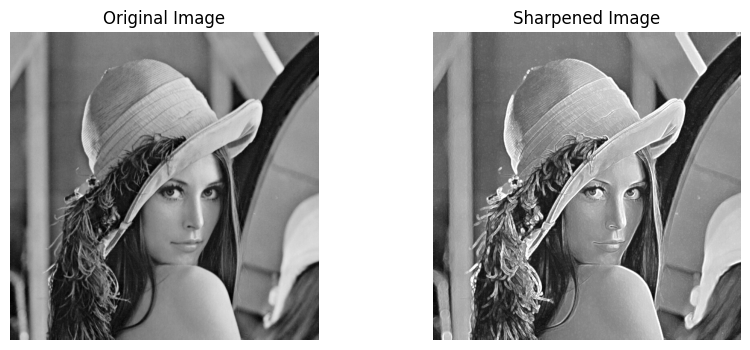

In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened, cmap="gray")
plt.axis("off")

plt.show()